In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

np.random.seed(2)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 30
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T
X = np.concatenate((X0, X1), axis=1)
y = np.concatenate((np.ones((1, N)), -1 * np.ones((1, N))), axis=1)
# Xbar
X = np.concatenate((np.ones((1, 2 * N)), X), axis=0)
print(y)
print(X)
print(X.shape)
print(y.shape)

# print(type(X))

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1.]]
[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.        ]
 [2.22096057 2.70132234 3.08493823 2.02701417 2.73223639 1.21171968
  2.22920603 1.8637762  1.74682699 2.37191737 2.47403369 2.09281249
  2.2

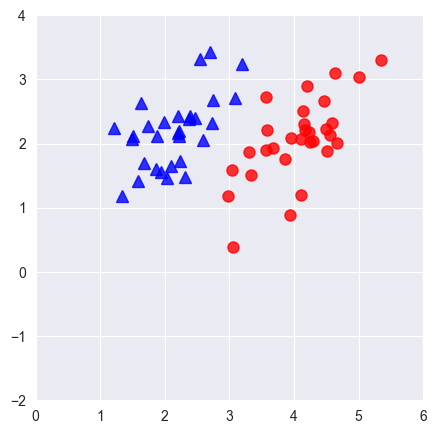

In [2]:
fig, ax = plt.subplots(figsize=(5, 5))
ani = plt.cla()
#plot points
ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize=8, alpha=.8)
ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize=8, alpha=.8)
ani = plt.axis([0, 6, -2, 4])
plt.show()

In [3]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x}
def h(w, x):
    return np.sign(np.dot(w.T, x))

In [4]:
#Stop condition
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)  #True if h(w, X) == y else False

In [5]:
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []  # set of miss position points
    while True:
        # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(3, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi * xi
                w.append(w_new)
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

In [6]:
d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
# print(w[-1])
print(X)
# print(accuracy_score(y, h(w[-1],X)))

[[ 13.97858527]
 [-15.02901929]
 [ 14.38743059]]
[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.        ]
 [2.22096057 2.70132234 3.08493823 2.02701417 2.73223639 1.21171968
  2.22920603 1.8637762  1.74682699 2.37191737 2.47403369 2.09281249
  2.22222334 2.58438569 2.74493118 1.6355797  3.19217738 1.51075436
  1.93784332 1.8787214  1.98435063 2.54694067 1.34122073 1.68360306
  2.39495504 1.58503193 2.20448688 1.49739755 2.2036588  2.30754036
  

(208, 61)
(1, 60)


In [7]:
def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1 * x11 + w0) / w2, -(w1 * x12 + w0) / w2], 'k')
    else:
        x10 = -w0 / w1
        return plt.plot([x10, x10], [-100, 100], 'k')

MovieWriter imagemagick unavailable; using Pillow instead.


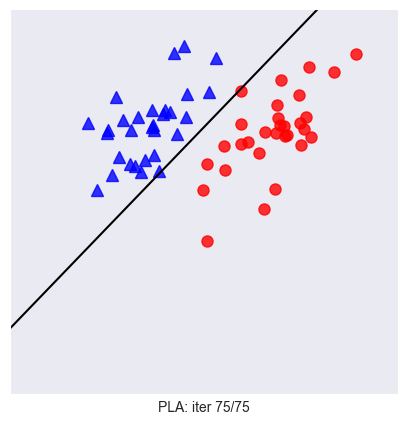

In [8]:
## Visualization
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation


def viz_alg_1d_2(w):
    it = len(w)
    fig, ax = plt.subplots(figsize=(5, 5))

    def update(i):
        ani = plt.cla()
        #points
        ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize=8, alpha=.8)
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize=8, alpha=.8)
        ani = plt.axis([0, 6, -2, 4])
        i2 = i if i < it else it - 1
        ani = draw_line(w[i2])
        if i < it - 1:
            # draw one misclassified point
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill=False)
            ax.add_artist(circle)
        # hide axis
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])
        label = 'PLA: iter %d/%d' % (i2, it - 1)
        ax.set_xlabel(label)
        return ani, ax
    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
    # save
    anim.save('D:\\pla_vis.gif', dpi=100, writer='imagemagick')
    plt.show()
viz_alg_1d_2(w)

#Ví Dụ 2

In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
main_df = pd.read_csv('sonar.all-data.csv',header=None)
main_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


<Axes: >

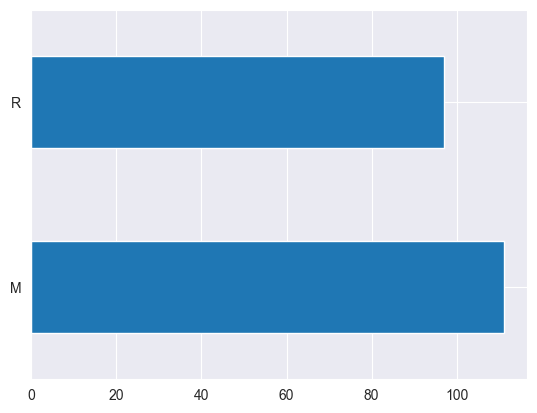

In [26]:
main_df[60].value_counts().plot(kind='barh')

In [27]:
y_df = main_df[60]
targes_label = {'M': 1,'R': -1}
targes_df = [targes_label[item] for item in y_df]
print(targes_df)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [28]:
inputs_df = main_df.drop(60, axis=1)
x0 = np.ones(( inputs_df.shape[0], 1))
X = np.concatenate((x0, inputs_df), axis = 1)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, targes_df, test_size=0.30, random_state=42)
print(X_train.shape)
print(len(y_train))

(145, 61)
145


In [34]:
# tien xu ly
X_train = np.transpose(X_train)
y_train = np.array(y_train).reshape(1,-1)
print(X_train.shape)
print(y_train.shape)


(61, 145)
(1, 145)


In [37]:
def perceptron(X, y, w_init):
    print(X.shape)
    print(y.shape)
    w = [w_init]
    N = X.shape[1]
    mis_points = []  # set of miss position points
    while True:
        # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(61, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi * xi
                w.append(w_new)
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)


In [39]:
d = X_train.shape[0]
w_init = np.random.randn(d, 1)
print(w_init.shape)
(w, m) = perceptron(X_train, y_train, w_init)

(61, 1)
(61, 145)
(1, 145)


In [40]:
w_best = w[-1]

In [41]:
print(w_best)

[[ -40.72452266]
 [ 155.13970861]
 [ -49.6364567 ]
 [-155.3780247 ]
 [ 156.23141703]
 [  40.63612716]
 [  33.08185666]
 [ -68.52957559]
 [ -26.44669106]
 [  53.59002427]
 [ -56.24617945]
 [  85.34674543]
 [  14.17989648]
 [  -4.19179827]
 [  -8.51951849]
 [  10.37891744]
 [ -28.18118222]
 [ -33.59190098]
 [  43.68860768]
 [ -19.96328598]
 [  55.19556273]
 [ -78.4803435 ]
 [  78.22790375]
 [ -56.77629984]
 [  66.51744826]
 [  -8.01320064]
 [ -14.13214339]
 [  -0.49866342]
 [  16.84572745]
 [ -27.95712599]
 [  73.40355872]
 [-104.13864397]
 [  31.55578788]
 [  41.60895251]
 [ -50.63326622]
 [  37.26939469]
 [ -68.80311891]
 [  16.52912675]
 [ -10.07317593]
 [  56.13245021]
 [ -53.94771431]
 [  -8.88197439]
 [ -27.59390169]
 [  62.25817619]
 [  -1.65370907]
 [  -6.68847936]
 [  55.72465058]
 [ -46.38049304]
 [ 145.1331809 ]
 [ 151.54523265]
 [-213.10047487]
 [ 100.95165989]
 [  68.9586512 ]
 [  22.90734193]
 [ 120.65003874]
 [  -5.92720249]
 [ -67.36290852]
 [ -91.38383396]
 [  47.2452210

In [44]:
print(X_test.shape)

(63, 61)


In [45]:
X_test = np.transpose(X_test)
y_test = np.array(y_test).reshape(1,-1)


(61, 145)
(1, 145)


In [46]:
print(X_test.shape)
print(y_test.shape)

(61, 63)
(1, 63)


In [47]:
y_pred = h(w_best, X_test)

In [48]:
print(accuracy_score(y_test, y_pred))

0.0


In [56]:
y_pred= np.array(y_pred, dtype= 'int')
print(y_test)
print(y_pred)
print(accuracy_score(y_pred, y_test))

[[ 1 -1 -1 -1  1 -1  1  1 -1  1  1 -1  1  1  1  1  1  1 -1 -1  1  1  1  1
  -1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1 -1  1 -1  1 -1  1 -1 -1  1  1
  -1 -1 -1  1 -1 -1 -1 -1  1  1 -1  1 -1  1  1]]
[[ 1 -1  1 -1  1  1  1  1 -1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1
  -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1  1
  -1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1 -1]]
0.0
